In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
landtemps = pd.read_csv("data/landtemps2019avgs.csv")
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [2]:
landtemps[['station','country','latabs','elevation','avgtemp']].\
  sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
10526,NEW_FORK_LAKE,United States,43.1167,2542.0,1.864167
1416,NEIR_AGDM,Canada,51.3667,1145.0,2.185000
2230,CURICO,Chile,34.9670,225.0,15.504167
6002,LIFTON_PUMPING_STN,United States,42.1231,1809.0,4.385833
2106,HUAILAI,China,40.4170,538.0,11.020833
2090,MUDANJIANG,China,44.5670,242.0,5.816667
7781,CHEYENNE_6SW_MESONET,United States,35.5461,694.0,14.875833
10502,SHARKSTOOTH,United States,37.5000,3267.5,4.105833
11049,CHALLIS_AP,United States,44.5228,1534.1,6.510000
2820,METHONI,Greece,36.8331,52.0,18.200000


In [3]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [4]:
landtemps.avgtemp.skew()

-0.26783825834817704

In [5]:
landtemps.avgtemp.kurtosis()

2.1698313707061074

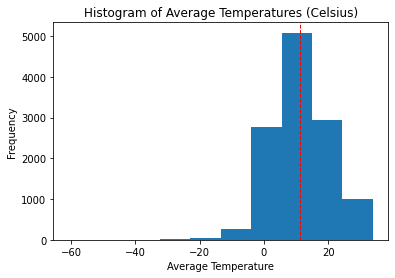

In [6]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

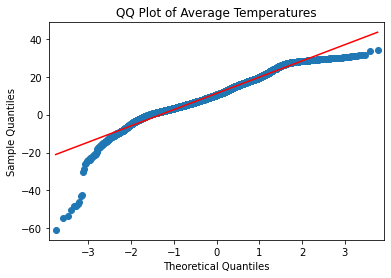

In [7]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title("QQ Plot of Average Temperatures")
plt.show()

In [8]:
covidtotals.total_cases_pm.skew()

4.284484653881833

In [9]:
covidtotals.total_cases_pm.kurtosis()

26.137524276840452

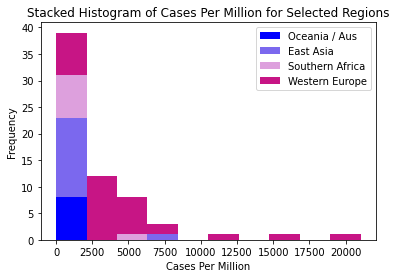

In [11]:
import numpy as np


showregions = ['Oceania / Aus','East Asia','Southern Africa', 'Western Europe']

def getcases(regiondesc):
  return covidtotals.loc[covidtotals.region==regiondesc,
    'total_cases_pm']

plt.hist([getcases(k) for k in showregions],\
  color=['blue','mediumslateblue','plum','mediumvioletred'],\
  label=showregions,\
  stacked=True)

plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


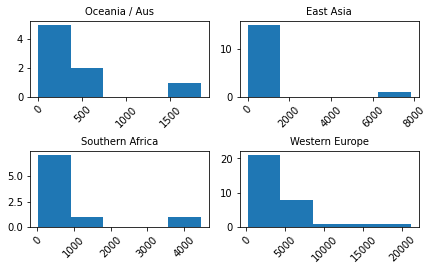

In [24]:
import seaborn

fig, axes = plt.subplots(2, 2)
#fig.title("Histograms of Covid Cases Per Million by Selected Regions")
axes = axes.ravel()
for j, ax in enumerate(axes):
  ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].\
    total_cases_pm, bins=5)
  ax.set_title(showregions[j], fontsize=10)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [26]:
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

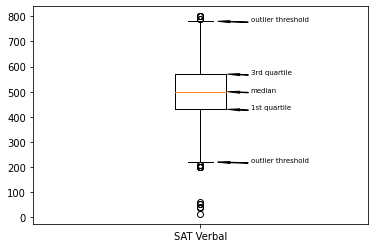

In [28]:
plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.95,15), xytext=(1.55,15), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.show()

In [29]:
weeksworked = nls97.loc[:, ['highestdegree','weeksworked16', 'weeksworked17']]

In [31]:
weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


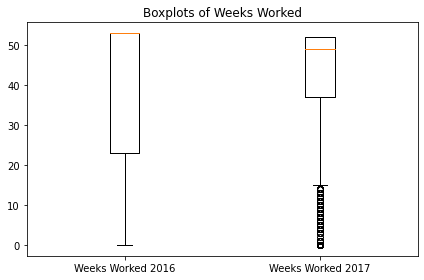

In [32]:
plt.boxplot([weeksworked.weeksworked16.dropna(),
  weeksworked.weeksworked17.dropna()],
  labels=['Weeks Worked 2016','Weeks Worked 2017'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

In [33]:
totvars = ['total_cases','total_deaths','total_cases_pm', 'total_deaths_pm']
totvarslabels = ['cases','deaths','cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.090000e+02,209.000000,209.000000,209.000000
mean,6.075741e+04,2702.952153,2297.022144,73.636522
std,2.724401e+05,11894.963052,4039.840203,156.341672
min,3.000000e+00,0.000000,1.229000,0.000000
25%,3.420000e+02,9.000000,202.834000,2.809000
50%,2.820000e+03,53.000000,868.866000,15.216000
75%,2.561100e+04,386.000000,2784.865000,58.374000
max,3.247684e+06,134814.000000,35795.159000,1237.551000


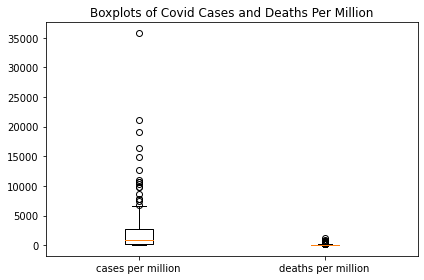

In [34]:
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

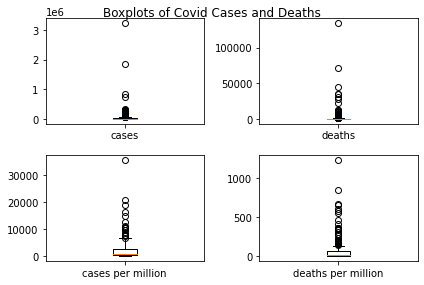

In [35]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes = axes.ravel()
for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j], labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [2]:
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)

In [3]:
nls97.groupby(['highestdegree'])['weeksworked17'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,40.0,52.0,52.0,510.0
1. GED,0.0,8.0,47.0,52.0,52.0,848.0
2. High School,0.0,31.0,49.0,52.0,52.0,2665.0
3. Associates,0.0,42.0,49.0,52.0,52.0,593.0
4. Bachelors,0.0,45.0,50.0,52.0,52.0,1342.0
5. Masters,0.0,46.0,50.0,52.0,52.0,538.0
6. PhD,0.0,46.5,50.0,52.0,52.0,51.0
7. Professional,0.0,47.0,50.0,52.0,52.0,97.0


C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


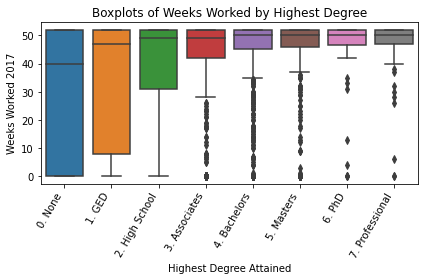

In [4]:
myplt = sns.boxplot('highestdegree','weeksworked17', data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [5]:
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,95.035,251.51850,339.0095,1726.15975,4435.327,22.0
Central Africa,14.696,71.09900,367.5180,1538.36600,3317.196,11.0
Central America,93.053,924.54750,1447.8430,2190.56500,10274.481,7.0
Central Asia,373.866,918.89625,1974.4910,2906.75950,10593.831,6.0
East Africa,8.521,65.41800,190.1960,268.91700,5015.172,13.0
East Asia,2.611,15.98500,64.6315,269.34525,7825.695,16.0
Eastern Europe,346.726,882.72775,1189.8350,2317.46025,6854.143,22.0
North Africa,105.342,202.14600,421.0720,426.71700,793.067,5.0
North America,2290.093,2566.99750,2843.9020,6327.77900,9811.656,3.0


C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points c

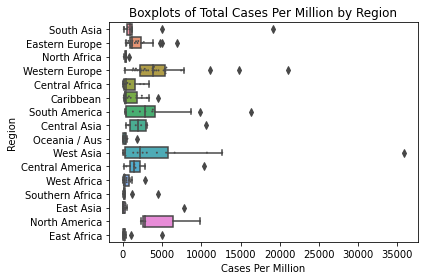

In [6]:
sns.boxplot('total_cases_pm', 'region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals, size=2, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [7]:
covidtotals.loc[covidtotals.total_cases_pm>=14000, ['location','total_cases_pm']]

,location,total_cases_pm
iso_code,,
BHR,Bahrain,19082.231
CHL,Chile,16322.745
QAT,Qatar,35795.159
SMR,San Marino,21038.364
VAT,Vatican,14833.127


C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mikol\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points c

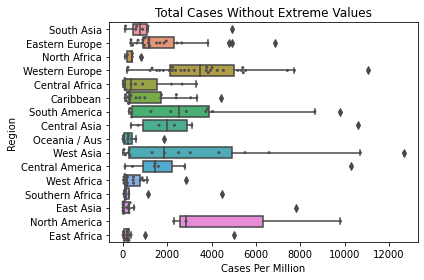

In [8]:
sns.boxplot('total_cases_pm', 'region', data=covidtotals.loc[covidtotals.total_cases_pm<14000])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<14000], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [8]:
sns.violinplot(nls97.satverbal, color="wheat", orient="v")
plt.title("Violin Plot of SAT Verbal Score")
plt.ylabel("SAT Verbal")
plt.text(0.08, 880, "outlier threshold", horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.75), "3rd quartile", horizontalalignment='center', size='x-small')
plt.text(0.05, nls97.satverbal.median(), "Median", horizontalalignment='center', size='x-small')
plt.text(0.065, nls97.satverbal.quantile(0.25), "1st quartile", horizontalalignment='center', size='x-small')
plt.text(0.08, 210, "outlier threshold", horizontalalignment='center', size='x-small')
plt.text(-0.4, 600, "frequency", horizontalalignment='center', size='x-small')
plt.show()

C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


ValueError: Image size of 370x191487 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [3]:
nls97.loc[:, ['weeksworked16','weeksworked17']].describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


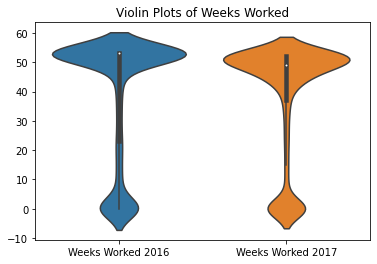

In [9]:
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16','weeksworked17']])
myplt.set_title("Violin Plots of Weeks Worked")
myplt.set_xticklabels(["Weeks Worked 2016","Weeks Worked 2017"])
plt.show()

C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


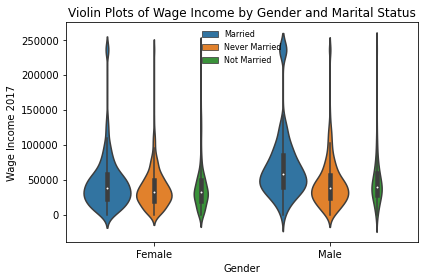

In [10]:
nls97["maritalstatuscollapsed"] = nls97.maritalstatus.\
  replace(['Married','Never-married','Divorced','Separated','Widowed'],\
  ['Married','Never Married','Not Married','Not Married','Not Married']) 
sns.violinplot(nls97.gender, nls97.wageincome, hue=nls97.maritalstatuscollapsed, scale="count")
plt.title("Violin Plots of Wage Income by Gender and Marital Status")
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title="", loc="upper center", framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


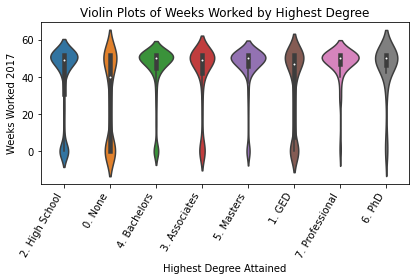

In [11]:
myplt = sns.violinplot('highestdegree','weeksworked17', data=nls97, rotation=40)
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
myplt.set_title("Violin Plots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
landtemps = pd.read_csv("data/landtemps2019avgs.csv")

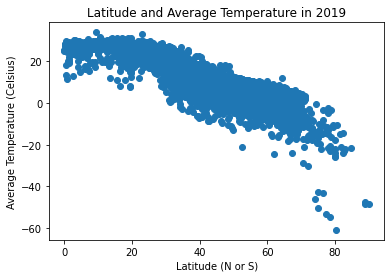

In [18]:
plt.scatter(x="latabs", y="avgtemp", data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.show()

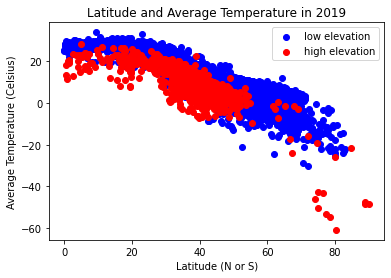

In [19]:
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2019")
plt.show()

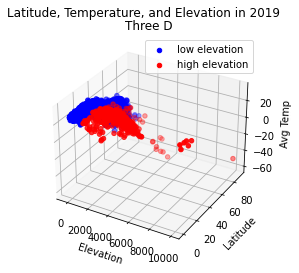

In [21]:
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2019")
ax = plt.axes(projection='3d')
ax.set_title('Three D')

ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label="low elevation", c="blue")
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label="high elevation", c="red")
ax.legend()
plt.show()

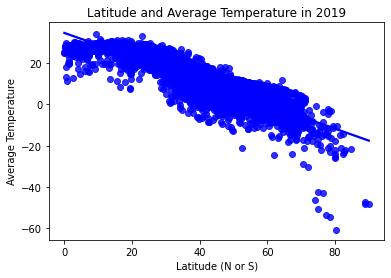

In [22]:
sns.regplot(x="latabs", y="avgtemp", color="blue", data=landtemps)
plt.title("Latitude and Average Temperature in 2019")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


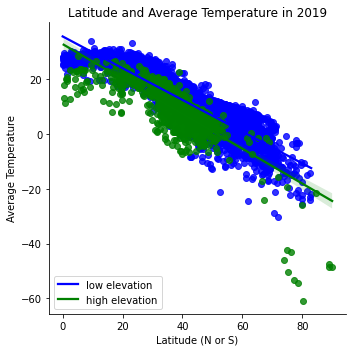

In [24]:
landtemps['elevation_group'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation_group", palette=dict(low="blue", high="green"), legend_out=False, data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.legend(('low elevation', 'high elevation'), loc='lower left')
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2019")
plt.tight_layout()
plt.show()

In [25]:

high.loc[(high.latabs>38) & (high.avgtemp>=18), ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
3943,LAJES_AB,Portugal,38.7303,1016.2,18.041667
5805,WILD_HORSE_6N,United States,38.9031,1438.7,22.770000


In [26]:
low.loc[(low.latabs>47) & (low.avgtemp>=14), ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1048,SAANICHTON_CDA,Canada,48.6167,61.0,17.820000
1146,CLOVERDALE_EAST,Canada,49.1167,50.0,14.751667
6830,WINNIBIGOSHISH_DAM,United States,47.4306,400.8,18.370000
7125,WINIFRED,United States,47.5589,988.5,16.310000


In [27]:
>>> import pandas as pd
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> import matplotlib.dates as mdates
>>> from matplotlib.dates import DateFormatter
>>> coviddaily = pd.read_csv("data/coviddaily720.csv", parse_dates=["casedate"])

In [28]:
>>> coviddaily.sample(2, random_state=1).T

,2478,9526
iso_code,BRB,FRA
casedate,2020-06-11 00:00:00,2020-02-16 00:00:00
location,Barbados,France
continent,North America,Europe
new_cases,4.0,0.0
new_deaths,0.0,0.0
population,287371.0,65273512.0
pop_density,664.463,122.578
median_age,39.8,42.0
gdp_per_capita,16978.068,38605.671


In [29]:
>>> coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
...   groupby(['casedate'])[['new_cases','new_deaths']].\
...   sum().\
...   reset_index()
>>> 
>>> coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
44,2020-03-16,12386.0,757.0
47,2020-03-19,20130.0,961.0
94,2020-05-05,77474.0,3998.0
78,2020-04-19,80127.0,6005.0
160,2020-07-10,228608.0,5441.0
11,2020-02-12,2033.0,97.0
117,2020-05-28,102619.0,5168.0


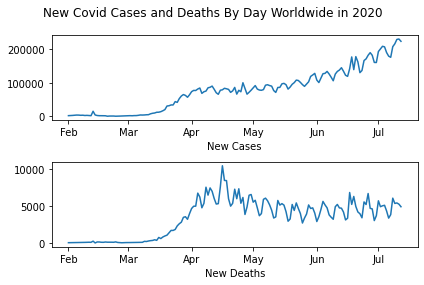

In [30]:
>>> fig = plt.figure()
>>> plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
>>> ax1 = plt.subplot(2,1,1)
>>> ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
>>> ax1.xaxis.set_major_formatter(DateFormatter("%b"))
>>> ax1.set_xlabel("New Cases")
>>> ax2 = plt.subplot(2,1,2)
>>> ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
>>> ax2.xaxis.set_major_formatter(DateFormatter("%b"))
>>> ax2.set_xlabel("New Deaths")
>>> plt.tight_layout()
>>> fig.subplots_adjust(top=0.88)
>>> plt.show()

In [31]:
>>> regiontotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
...   groupby(['casedate','region'])[['new_cases','new_deaths']].\
...   sum().\
...   reset_index()
>>> 
>>> regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
1518,2020-05-16,North Africa,634.0,28.0
2410,2020-07-11,Central Asia,3873.0,26.0
870,2020-04-05,Western Europe,30090.0,4079.0
1894,2020-06-08,Western Europe,3712.0,180.0
790,2020-03-31,Western Europe,30180.0,2970.0
2270,2020-07-02,North Africa,2006.0,89.0
306,2020-02-26,Oceania / Aus,0.0,0.0


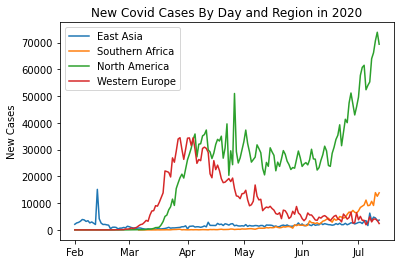

In [33]:
>>> showregions = ['East Asia','Southern Africa','North America',
...   'Western Europe']
>>> 
>>> for j in range(len(showregions)):
...   rt = regiontotals.loc[regiontotals.region==showregions[j],
...     ['casedate','new_cases']]
...   plt.plot(rt.casedate, rt.new_cases, label=showregions[j])
... 
>>> plt.title("New Covid Cases By Day and Region in 2020")
>>> plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
>>> plt.ylabel("New Cases")
>>> plt.legend()
>>> plt.show()


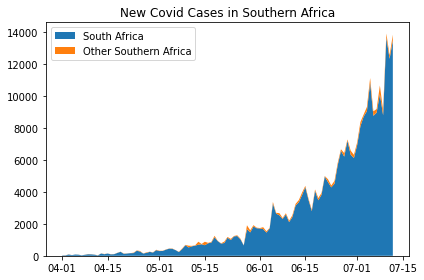

In [34]:
>>> af = regiontotals.loc[regiontotals.region=='Southern Africa',
...   ['casedate','new_cases']].rename(columns={'new_cases':'afcases'})
>>> sa = coviddaily.loc[coviddaily.location=='South Africa',
...   ['casedate','new_cases']].rename(columns={'new_cases':'sacases'})
>>> af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how="left")
>>> af.sacases.fillna(0, inplace=True)
>>> af['afcasesnosa'] = af.afcases-af.sacases
>>> afabb = af.loc[af.casedate.between('2020-04-01','2020-07-12')]
>>> fig = plt.figure()
>>> ax = plt.subplot()
>>> ax.stackplot(afabb.casedate, afabb.sacases, afabb.afcasesnosa, labels=['South Africa','Other Southern Africa'])
>>> ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
>>> plt.title("New Covid Cases in Southern Africa")
>>> plt.tight_layout()
>>> plt.legend(loc="upper left")
>>> plt.show()

In [35]:
>>> import pandas as pd
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> import seaborn as sns
>>> covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])

In [36]:
>>> corr = covidtotals.corr()
>>> corr[['total_cases','total_deaths','total_cases_pm','total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.000000,0.930848,0.230787,0.264819
total_deaths,0.930848,1.000000,0.198456,0.414162
total_cases_pm,0.230787,0.198456,1.000000,0.486600
total_deaths_pm,0.264819,0.414162,0.486600,1.000000
population,0.341093,0.281600,-0.042531,-0.001249
pop_density,-0.027335,-0.032487,0.082927,0.021110
median_age,0.115204,0.173887,0.217352,0.375408
gdp_per_capita,0.134902,0.163701,0.576568,0.372001
hosp_beds,-0.014727,-0.012415,0.015465,0.090870


C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mikol\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


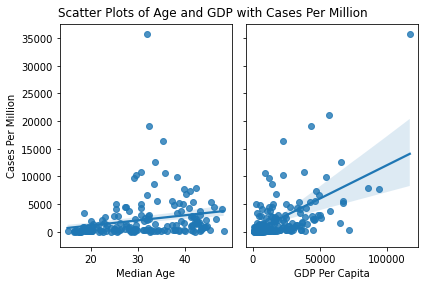

In [37]:
>>> fig, axes = plt.subplots(1,2, sharey=True)
>>> sns.regplot(covidtotals.median_age, covidtotals.total_cases_pm, ax=axes[0])
>>> sns.regplot(covidtotals.gdp_per_capita, covidtotals.total_cases_pm, ax=axes[1])
>>> axes[0].set_xlabel("Median Age")
>>> axes[0].set_ylabel("Cases Per Million")
>>> axes[1].set_xlabel("GDP Per Capita")
>>> axes[1].set_ylabel("")
>>> plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
>>> plt.tight_layout()
>>> fig.subplots_adjust(top=0.92)
>>> plt.show()

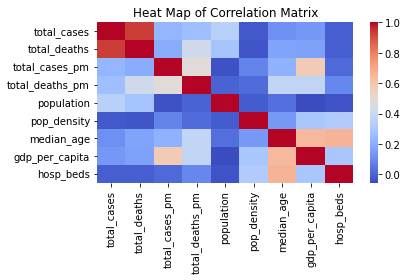

In [38]:
>>> sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
>>> plt.title('Heat Map of Correlation Matrix')
>>> plt.tight_layout()
>>> plt.show()